# **Importing all the required libraries.**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE


1. **Reading the csv file with pandas**

In [2]:
df = pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Visualisation

1. ****Plot --> Hypertension****

0    4612
1     498
Name: hypertension, dtype: int64


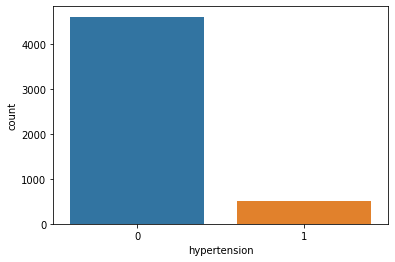

In [3]:
sns.countplot(x=df['hypertension'],data=df)
print(df.hypertension.value_counts())

****Plot -> Heart_disease****

0    4834
1     276
Name: heart_disease, dtype: int64


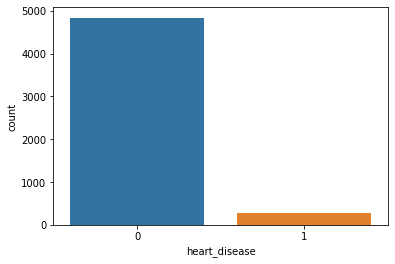

In [4]:
sns.countplot(x=df['heart_disease'],data=df)
print(df.heart_disease.value_counts())

**Plot -> gender**

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


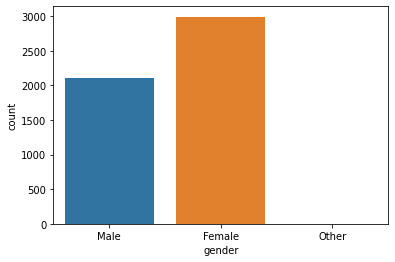

In [5]:
sns.countplot(x=df['gender'],data=df)
print(df.gender.value_counts())

**plot -> Married**

Yes    3353
No     1757
Name: ever_married, dtype: int64


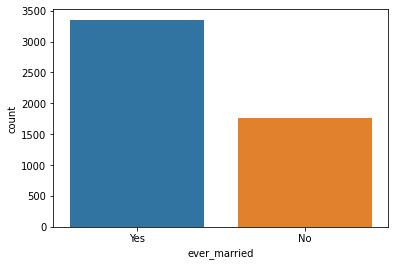

In [6]:
sns.countplot(x=df['ever_married'],data=df)
print(df.ever_married.value_counts())

**Plot -> WorkType**

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


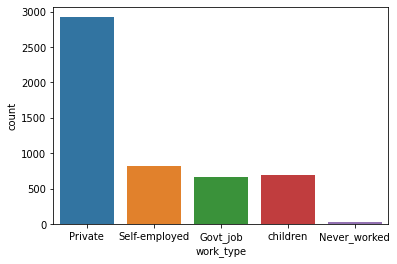

In [7]:
sns.countplot(x=df.work_type,data=df)
print(df.work_type.value_counts())

***Plot -> Residence Type***

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


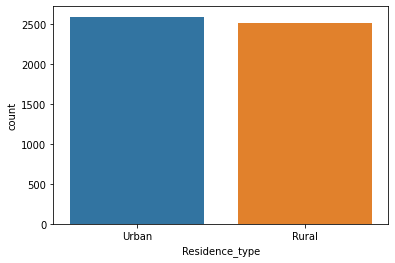

In [8]:
sns.countplot(x=df.Residence_type,data=df)
print(df.Residence_type.value_counts())

**Plot -> Smoking Status**

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


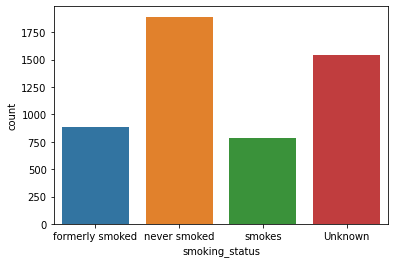

In [9]:
sns.countplot(x=df.smoking_status,data=df)
print(df.smoking_status.value_counts())

**Plot -> Strok**

0    4861
1     249
Name: stroke, dtype: int64


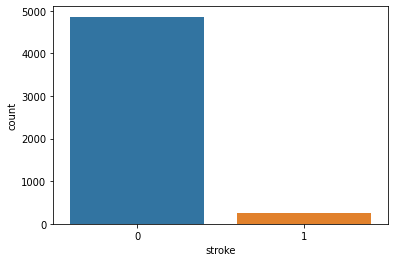

In [10]:
sns.countplot(x=df.stroke,data=df)
print(df.stroke.value_counts())

# **Corelation Plots**

**Plot b/w gender and stroke**

<AxesSubplot:xlabel='gender', ylabel='count'>

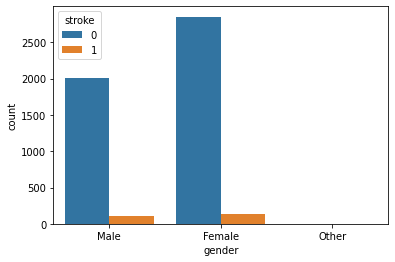

In [11]:
sns.countplot(x=df['gender'],hue=df['stroke'],data=df)

*****Plot B/w hypertension and stroke*****

<AxesSubplot:xlabel='hypertension', ylabel='count'>

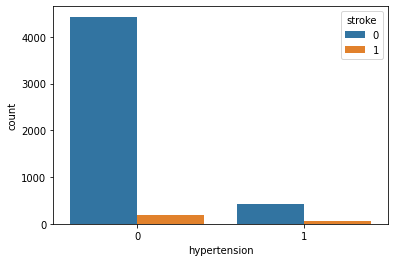

In [12]:
sns.countplot(x=df['hypertension'],hue=df['stroke'],data=df)

***Plot b/w heart_disease and stroke***

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

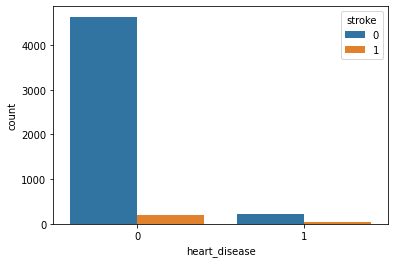

In [13]:
sns.countplot(x=df['heart_disease'],hue=df['stroke'],data=df)

***Plot b/w married  and storke***

<AxesSubplot:xlabel='ever_married', ylabel='count'>

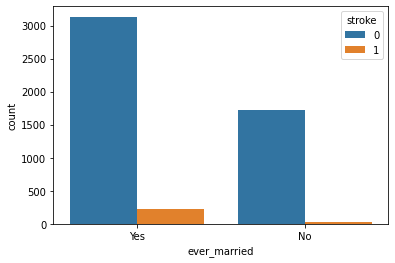

In [14]:
sns.countplot(x=df['ever_married'],hue=df['stroke'],data=df)

***Plot b/w worktype and stroke***

<AxesSubplot:xlabel='work_type', ylabel='count'>

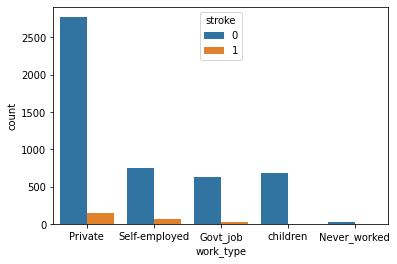

In [15]:
sns.countplot(x=df['work_type'],hue=df['stroke'],data=df)

***Plot b/w Residence type and strole***

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

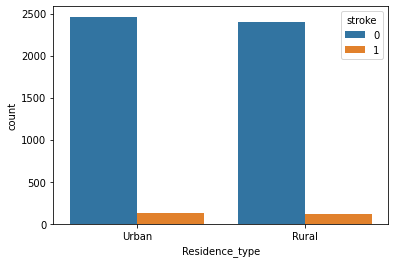

In [16]:
sns.countplot(x=df['Residence_type'],hue=df['stroke'],data=df)

***Plot b/w smoking status and stroke***

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

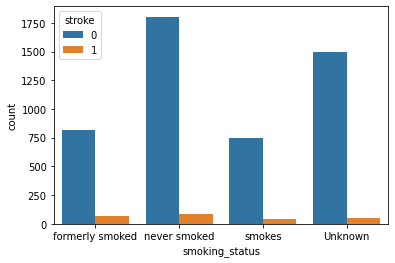

In [17]:
sns.countplot(x=df['smoking_status'],hue=df['stroke'],data=df)

In [18]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


# ***Data Preprocessing***

# 1. **Handling Missing Values**

***checking for null values ***

In [19]:
df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

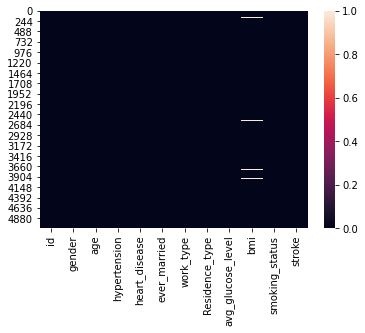

In [20]:
sns.heatmap(df.isnull())

**We see in bmi cloumn we have null values**
**Lets check how many null values are there in bmi cloumn**

In [21]:
df['bmi'].isnull().sum()

201

**There are 201 Missing values in bmi we have to fill them, Here We use mean and fill them**

In [22]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

**Now lets still there are missing values**

In [23]:
df['bmi'].isnull().sum()

0

<AxesSubplot:>

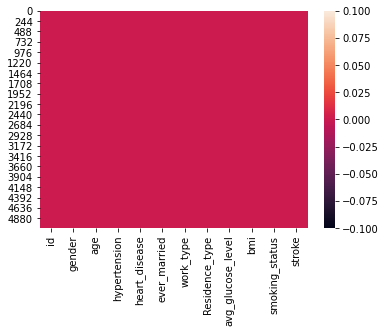

In [24]:
sns.heatmap(df.isnull())

 # 2. ***Outlier Removal***

***Outlier Visualization***

<AxesSubplot:xlabel='bmi'>

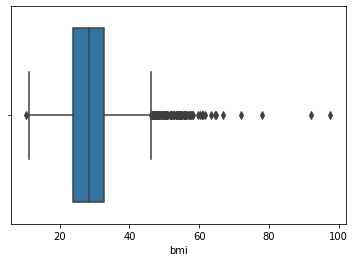

In [25]:
sns.boxplot(x='bmi',data=df)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

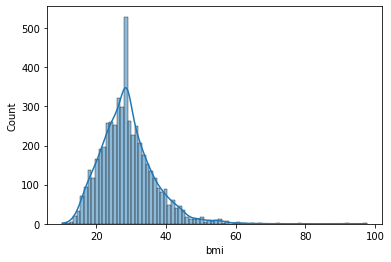

In [26]:
sns.histplot(df.bmi,kde=True)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

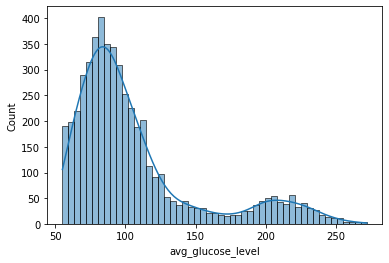

In [27]:
sns.histplot(df.avg_glucose_level,kde=True)

* **outlier removal by iqr method**

In [28]:
q1,q3=np.percentile(df['bmi'],[25,75])

In [29]:
q1

23.8

In [30]:
q3

32.8

In [31]:
iqr=q3-q1
iqr

8.999999999999996

In [32]:
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

In [33]:
lower_limit

10.300000000000006

In [34]:
upper_limit

46.29999999999999

In [35]:
df.drop(df[df['bmi']>upper_limit].index,inplace=True)
df.drop(df[df['bmi']<lower_limit].index,inplace=True)

**Outliers are removed lets plot graph again**

<AxesSubplot:xlabel='bmi', ylabel='Count'>

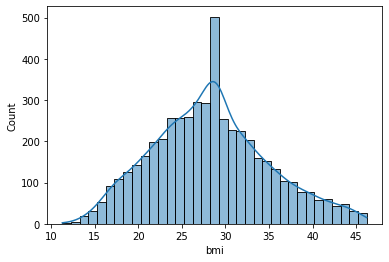

In [36]:
sns.histplot(df.bmi,kde=True)

<AxesSubplot:xlabel='bmi'>

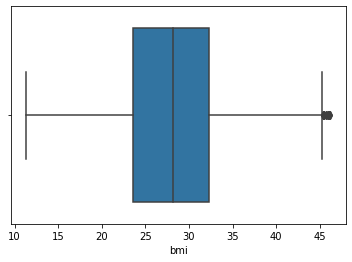

In [37]:
sns.boxplot(x='bmi',data=df)

***gender has a one column with other so we can remove it***

In [38]:
print(df.gender.value_counts())
df.drop(df[df['gender']== 'Other'].index,inplace=True)
print(df.gender.value_counts())

Female    2895
Male      2088
Other        1
Name: gender, dtype: int64
Female    2895
Male      2088
Name: gender, dtype: int64


1. ***Categorical values - Handling  ***

One hot encoding 

In [39]:
sex=pd.get_dummies(df['gender'],drop_first=True)
married = pd.get_dummies(df['ever_married'],drop_first=True)
residence=pd.get_dummies(df['Residence_type'],drop_first=True)
df = pd.concat([df,sex],axis=1)
df = pd.concat([df,married],axis=1)
df=pd.concat([df,residence],axis=1)

In [40]:
df.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Male,Yes,Urban
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,1


In [41]:
print(df['work_type'].value_counts())

Private          2835
Self-employed     801
children          686
Govt_job          639
Never_worked       22
Name: work_type, dtype: int64


In [42]:
print(df['smoking_status'].value_counts())

never smoked       1836
Unknown            1515
formerly smoked     861
smokes              771
Name: smoking_status, dtype: int64


***Target encoding***


In [43]:
df["Work_Type"] = df["work_type"].map({'children':0,'Never_worked':1, 'Govt_job':2, 'Self-employed':3, 'Private':4})
# children majorly wont affect by strokes and never worked too but private ppl will have pressures may get more chnace
df["Smoking_Status"] = df["smoking_status"].map({'never smoked':0, 'formerly smoked':1, 'smokes':2, 'Unknown':3})

***Now drop our columns which are not encoded***

In [44]:
df.drop(['id','gender','ever_married','work_type','Residence_type','smoking_status'],axis=1,inplace=True)

 ***renaming to orginal column names ***

In [45]:
df.rename(columns={'Male':'gender','Yes':'ever_married','Urban':'Residence_type'},inplace=True)

In [46]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,Residence_type,Work_Type,Smoking_Status
0,67.0,0,1,228.69,36.600000,1,1,1,1,4,1
1,61.0,0,0,202.21,28.893237,1,0,1,0,3,0
2,80.0,0,1,105.92,32.500000,1,1,1,0,4,0
3,49.0,0,0,171.23,34.400000,1,0,1,1,4,2
4,79.0,1,0,174.12,24.000000,1,0,1,0,3,0


# ***Balanacing the target field***

***We observed in stroke(target field) the data is imbalanced 
that is stroke->0 has around 4700 and with 1 around 270 
If we create model with this it will impact our model, our model will only consider majority,
so we get always 0 has prediction.
To overcome this we have to do Under sampling or over sampling***

***Im using Oversampling - SMOTE method to balance the data ,
This will bring minority class equal to majority class***

In [47]:
X = df.drop(['stroke'],axis=1)
y = df['stroke']
smote = SMOTE()
X,y = smote.fit_resample(X,y)

In [48]:
y.value_counts()

0    4737
1    4737
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

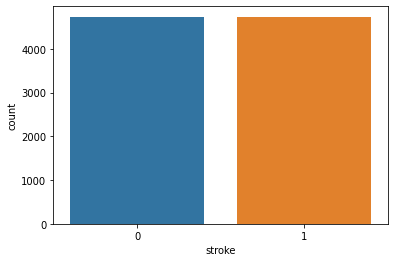

In [49]:
y = pd.DataFrame({'stroke':y})
sns.countplot(data = y, x = 'stroke', y= None)

***Now we see our target data are balanced
Our data points are doubled in x and y so that we can get more accurate model
Now lets make this as datafram***

In [50]:
y.head(2)

,stroke
0,1
1,1


In [51]:
X.head(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,Residence_type,Work_Type,Smoking_Status
0,67.0,0,1,228.69,36.600000,1,1,1,4,1
1,61.0,0,0,202.21,28.893237,0,1,0,3,0


In [52]:
df = pd.concat([X,y],axis = 1)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,Residence_type,Work_Type,Smoking_Status,stroke
0,67.0,0,1,228.69,36.600000,1,1,1,4,1,1
1,61.0,0,0,202.21,28.893237,0,1,0,3,0,1
2,80.0,0,1,105.92,32.500000,1,1,0,4,0,1
3,49.0,0,0,171.23,34.400000,0,1,1,4,2,1
4,79.0,1,0,174.12,24.000000,0,1,0,3,0,1


***Our Data set is clean now we can split dataset into x and y***

In [53]:
X=df.drop(['stroke'],axis=1)
y=df['stroke']

***From Train and split library we will split data into training set and testing set***

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

***Lets create models***

**> Logistic Regression Model**

In [55]:
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

***Lets Predict***

In [56]:
Logistic_pred = Logistic_model.predict(X_test)

***Accuracy of the model***

In [57]:
print("accuracy of Logistic model is : ",accuracy_score(y_test,Logistic_pred))

accuracy of Logistic model is :  0.8063324538258575


***Decision tree classification model***

In [58]:
Decision_model=DecisionTreeClassifier()
Decision_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
Decision_pred = Decision_model.predict(X_test)
print("accuracy of Decision_model is : ",accuracy_score(y_test,Decision_pred))

accuracy of Decision_model is :  0.8970976253298153


***Random Forest Classification Model***

In [60]:
Random_model = RandomForestClassifier()
Random_model.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
Random_pred=Random_model.predict(X_test)
print("accuracy of Random model is : ",accuracy_score(y_test,Random_pred))

accuracy of Random model is :  0.9382585751978891


**SVC MODEL**

In [62]:
Svc_model = SVC()
Svc_model.fit(X_train,y_train)

SVC()

In [63]:
Svc_predict = Svc_model.predict(X_test)
print("accuracy of Svc model is : ",accuracy_score(y_test,Svc_predict))

accuracy of Svc model is :  0.7762532981530343


In [64]:
# lets save the model 
import joblib
joblib_file = "BrainStroke_prediction_mlops_rf.h5"
joblib.dump(Random_model, joblib_file)

['BrainStroke_prediction_mlops_rf.h5']